In [28]:
library(MASS)
library(plyr)
library(dplyr)
library(readr)
library(ggplot2)
library(reshape2)

In [29]:
options(repr.plot.height=5)
options(repr.matrix.max.rows=20)
options(repr.matrix.max.columns=10)

#User file
lenskitFile <- "data/demographic-eval/movielens-user-results.csv"
lastFmFile <- "data/demographic-eval/lastfm-user-results.csv"

#1R File
# lenskitFile <- "data/demographic-eval/movielens-1R-items.csv"
# lastFmFile <- "data/demographic-eval/lastfm-1R-items.csv"

#Normal File
#lenskitFile <- "data/demographic-eval/movielens-results.csv"
#lastFmFile <- "data/demographic-eval/lastfm-results.csv"

In [30]:
drawplot = function(plot, file=NA, width=5, height=3, ...) {
    if (!is.na(file)) {
        png(paste(file, "png", sep="."), width=width, height=height, units='in', res=600, ...)
        print(plot)
        dev.off()
        pdf(paste(file, "pdf", sep="."), width=width, height=height, ...)
        print(plot)
        dev.off()
    }
    plot
}

# Load Lenskit 1M

In [53]:
lenskit.meta = read_delim("data/lk1m/users.dat", delim=":",
                   col_names=c("id", "gender", "age", "occupation", "zip"),
                   col_types="i_c_c_c_c") %>%
    mutate(gender=as.factor(gender))
lenskit.meta
lenskit.meta$age[ as.numeric(lenskit.meta$age) < 18] <- "[1-17]"
lenskit.meta$age[as.numeric(lenskit.meta$age) >= 18 & as.numeric(lenskit.meta$age) < 25] <- "[18-24]"
lenskit.meta$age[as.numeric(lenskit.meta$age) >= 25 &  as.numeric(lenskit.meta$age) < 35] <- "[25-34]"
lenskit.meta$age[as.numeric(lenskit.meta$age) >= 35 &  as.numeric(lenskit.meta$age) < 45] <- "[35-44]"
lenskit.meta$age[as.numeric(lenskit.meta$age) >= 45 & as.numeric(lenskit.meta$age) < 56] <- "[45-55]"
lenskit.meta$age[as.numeric(lenskit.meta$age) >= 56 ] <- "[56+]"
lenskit.meta$age = as.factor(lenskit.meta$age)
#lenskit.meta


id,gender,age,occupation,zip
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455
6,F,50,9,55117
7,M,35,1,06810
8,M,25,12,11413
9,M,25,17,61614
10,F,35,1,95370


Warning message in lenskit.meta$age[as.numeric(lenskit.meta$age) >= 18 & as.numeric(lenskit.meta$age) < :
“NAs introduced by coercion”Warning message in lenskit.meta$age[as.numeric(lenskit.meta$age) >= 18 & as.numeric(lenskit.meta$age) < :
“NAs introduced by coercion”Warning message in lenskit.meta$age[as.numeric(lenskit.meta$age) >= 25 & as.numeric(lenskit.meta$age) < :
“NAs introduced by coercion”Warning message in lenskit.meta$age[as.numeric(lenskit.meta$age) >= 25 & as.numeric(lenskit.meta$age) < :
“NAs introduced by coercion”Warning message in lenskit.meta$age[as.numeric(lenskit.meta$age) >= 35 & as.numeric(lenskit.meta$age) < :
“NAs introduced by coercion”Warning message in lenskit.meta$age[as.numeric(lenskit.meta$age) >= 35 & as.numeric(lenskit.meta$age) < :
“NAs introduced by coercion”Warning message in lenskit.meta$age[as.numeric(lenskit.meta$age) >= 45 & as.numeric(lenskit.meta$age) < :
“NAs introduced by coercion”Warning message in lenskit.meta$age[as.numeric(lenskit.meta$ag

In [54]:
summary(select(lenskit.meta, gender, age))

 gender        age      
 F:1709   [1-17] : 222  
 M:4331   [18-24]:1103  
          [25-34]:2096  
          [35-44]:1193  
          [45-55]:1046  
          [56+]  : 380  

In [58]:
user.results.lenskit1m = read_csv(lenskitFile, guess_max=10000) %>%
    rename(user=User) %>%
    mutate(DataSet=as.factor(DataSet), Algorithm=as.factor(Algorithm)) %>%
    inner_join(lenskit.meta %>% rename(user=id))
user.results.lenskit1m

Parsed with column specification:
cols(
  DataSet = col_character(),
  Partition = col_integer(),
  Algorithm = col_character(),
  User = col_integer(),
  TestTime = col_double(),
  Rank = col_integer(),
  RecipRank = col_double(),
  `1R.Rank` = col_character(),
  `1R.RecipRank` = col_character()
)
Joining, by = "user"


DataSet,Partition,Algorithm,user,TestTime,Rank,RecipRank,1R.Rank,1R.RecipRank,gender,age,occupation,zip
ML-1M.UI,4,Pop-B,4041,0.343,58,0.01724138,NA,NA,M,[18-24],3,48005
ML-1M.UI,5,Pop-B,3934,0.344,NA,0.00000000,NA,NA,M,[25-34],0,44512
ML-1M.UI,5,Pop-B,3935,1.687,NA,0.00000000,NA,NA,M,[35-44],18,72118
ML-1M.UI,4,Pop-B,4042,1.726,NA,0.00000000,NA,NA,M,[35-44],15,94002
ML-1M.UI,5,Pop-B,3939,0.133,NA,0.00000000,NA,NA,M,[45-55],7,91405
ML-1M.UI,4,Pop-B,4043,0.140,NA,0.00000000,NA,NA,F,[25-34],15,94002
ML-1M.UI,5,Pop-B,3945,0.126,74,0.01351351,NA,NA,F,[45-55],1,96778
ML-1M.UI,4,Pop-B,4048,0.145,42,0.02380952,NA,NA,F,[35-44],1,89431
ML-1M.UI,5,Pop-B,3946,0.125,NA,0.00000000,NA,NA,F,[25-34],12,22207
ML-1M.UI,4,Pop-B,4049,0.139,NA,0.00000000,NA,NA,M,[45-55],11,33133


In [59]:
summary(select(user.results.lenskit1m, DataSet, Algorithm, gender, age, RecipRank))

     DataSet        Algorithm     gender         age          RecipRank      
 ML-1M   :48320   II-B   :15495   F:34136   [1-17] : 4168   Min.   :0.00000  
 ML-1M.UI:75640   II-E   :15495   M:89824   [18-24]:22512   1st Qu.:0.00000  
                  Mean-E :15495             [25-34]:44648   Median :0.00000  
                  MF-B   :15495             [35-44]:24112   Mean   :0.04619  
                  MF-E   :15495             [45-55]:21408   3rd Qu.:0.01493  
                  Pop-B  :15495             [56+]  : 7112   Max.   :1.00000  
                  (Other):30990                                              

# Load Last.FM

In [35]:
##### id,key,gender,age

usersLastfm = read_delim("data/lastfm/lastfm-users.csv", delim=",", 
                   col_names=c("id", "key", "gender", "age") )
#usersLastfm <-  subset(usersLastfm, select = c("user", "gender", "age"))
#usersLastfm$age <- as.integer(usersLastfm$age)
usersLastfm$age <- as.numeric(as.character(usersLastfm$age))
usersLastfm$gender[usersLastfm$gender == "f"] <- "F"
usersLastfm$gender[usersLastfm$gender == "m"] <- "M"
usersLastfm$gender = as.factor(usersLastfm$gender)
usersLastfm$age[ as.numeric(usersLastfm$age) < 18] <- "[1-17]"
usersLastfm$age[as.numeric(usersLastfm$age) >= 18 & as.numeric(usersLastfm$age) < 25] <- "[18-24]"
usersLastfm$age[as.numeric(usersLastfm$age) >= 25 &  as.numeric(usersLastfm$age) < 35] <- "[25-34]"
usersLastfm$age[as.numeric(usersLastfm$age) >= 35 &  as.numeric(usersLastfm$age) < 45] <- "[35-44]"
usersLastfm$age[as.numeric(usersLastfm$age) >= 45 & as.numeric(usersLastfm$age) < 56] <- "[45-55]"
usersLastfm$age[as.numeric(usersLastfm$age) >= 56 ] <- "[56+]"
#usersLastfm$dataset = as.factor("LastFM")
usersLastfm$age = as.factor(usersLastfm$age)

users.meta=usersLastfm
usersLastfm

Parsed with column specification:
cols(
  id = col_integer(),
  key = col_character(),
  gender = col_character(),
  age = col_integer()
)
Warning message in usersLastfm$age[as.numeric(usersLastfm$age) >= 18 & as.numeric(usersLastfm$age) < :
“NAs introduced by coercion”Warning message in usersLastfm$age[as.numeric(usersLastfm$age) >= 18 & as.numeric(usersLastfm$age) < :
“NAs introduced by coercion”Warning message in usersLastfm$age[as.numeric(usersLastfm$age) >= 25 & as.numeric(usersLastfm$age) < :
“NAs introduced by coercion”Warning message in usersLastfm$age[as.numeric(usersLastfm$age) >= 25 & as.numeric(usersLastfm$age) < :
“NAs introduced by coercion”Warning message in usersLastfm$age[as.numeric(usersLastfm$age) >= 35 & as.numeric(usersLastfm$age) < :
“NAs introduced by coercion”Warning message in usersLastfm$age[as.numeric(usersLastfm$age) >= 35 & as.numeric(usersLastfm$age) < :
“NAs introduced by coercion”Warning message in usersLastfm$age[as.numeric(usersLastfm$age) >= 45 & as.n

id,key,gender,age
1,00000c289a1829a808ac09c00daf10bc3c4e223b,F,[18-24]
2,00001411dc427966b17297bf4d69e7e193135d89,F,NA
3,00004d2ac9316e22dc007ab2243d6fcb239e707d,NA,NA
4,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,M,[18-24]
5,00007a47085b9aab8af55f52ec8846ac479ac4fe,M,[25-34]
6,0000c176103e538d5c9828e695fed4f7ae42dd01,M,[18-24]
7,0000ee7dd906373efa37f4e1185bfe1e3f8695ae,M,[1-17]
8,0000ef373bbd0d89ce796abae961f2705e8c1faf,F,[18-24]
9,0000f687d4fe9c1ed49620fbc5ed5b0d7798ea20,F,[18-24]
10,0001399387da41d557219578fb08b12afa25ab67,M,NA


In [36]:
summary(select(usersLastfm, gender, age))

  gender            age        
 F   : 84930   [1-17] : 21534  
 M   :241642   [18-24]:147001  
 NA's: 32775   [25-34]: 85600  
               [35-44]: 20765  
               [45-55]:  5937  
               [56+]  :  3610  
               NA's   : 74900  

In [37]:
user.results.lastFm = read_csv(lastFmFile, guess_max=10000) %>%
    rename(user=User) %>%
    filter(Algorithm != 'II-C') %>%
    mutate(Algorithm = gsub("-CS", "-C", Algorithm)) %>%
    inner_join(usersLastfm %>% rename(user=id) %>% select(-key))
user.results.lastFm

Parsed with column specification:
cols(
  DataSet = col_character(),
  Partition = col_integer(),
  Algorithm = col_character(),
  User = col_integer(),
  TestTime = col_double(),
  Rank = col_integer(),
  RecipRank = col_double(),
  `1R.Rank` = col_character(),
  `1R.RecipRank` = col_character()
)
Joining, by = "user"


DataSet,Partition,Algorithm,user,TestTime,Rank,RecipRank,1R.Rank,1R.RecipRank,gender,age
LastFM.UI,5,Pop-C,244377,0.408,NA,0.00,NA,NA,M,[35-44]
LastFM.UI,5,Pop-B,244377,0.415,NA,0.00,NA,NA,M,[35-44]
LastFM.UI,3,Pop-B,247474,0.426,NA,0.00,NA,NA,M,[25-34]
LastFM.UI,3,Pop-C,247474,0.427,NA,0.00,NA,NA,M,[25-34]
LastFM.UI,2,Pop-B,244210,0.423,4,0.25,NA,NA,M,NA
LastFM.UI,2,Pop-C,244210,0.432,4,0.25,NA,NA,M,NA
LastFM.UI,5,Pop-C,244394,0.043,NA,0.00,NA,NA,M,[25-34]
LastFM.UI,5,Pop-B,244394,0.049,NA,0.00,NA,NA,M,[25-34]
LastFM.UI,2,Pop-B,244251,0.044,NA,0.00,NA,NA,NA,NA
LastFM.UI,2,Pop-C,244251,0.029,NA,0.00,NA,NA,NA,NA


In [38]:
summary(select(user.results.lastFm, Algorithm, gender, age, RecipRank))

  Algorithm          gender            age           RecipRank      
 Length:296424      F   : 70560   [1-17] : 17820   Min.   :0.00000  
 Class :character   M   :198582   [18-24]:121182   1st Qu.:0.00000  
 Mode  :character   NA's: 27282   [25-34]: 70482   Median :0.00000  
                                  [35-44]: 17436   Mean   :0.07456  
                                  [45-55]:  4956   3rd Qu.:0.02273  
                                  [56+]  :  2736   Max.   :1.00000  
                                  NA's   : 61812                    

# Concat Datasets

In [60]:
user.results <- rbind.fill(user.results.lastFm, user.results.lenskit1m) %>%
    mutate(DataSet = as.factor(DataSet),
           Algorithm = as.factor(Algorithm))
summary(user.results)

      DataSet         Partition       Algorithm          user       
 LastFM   :150000   Min.   :1.000   II-B   :64899   Min.   :     1  
 LastFM.UI:146424   1st Qu.:2.000   MF-B   :64899   1st Qu.:  4889  
 ML-1M    : 48320   Median :3.000   Pop-B  :64899   Median :110474  
 ML-1M.UI : 75640   Mean   :2.998   II-C   :49404   Mean   :131252  
                    3rd Qu.:4.000   MF-C   :49404   3rd Qu.:239607  
                    Max.   :5.000   Pop-C  :49404   Max.   :358714  
                                    (Other):77475                   
    TestTime            Rank          RecipRank         1R.Rank         
 Min.   : 0.0000   Min.   :  1.00   Min.   :0.00000   Length:420384     
 1st Qu.: 0.0900   1st Qu.:  4.00   1st Qu.:0.00000   Class :character  
 Median : 0.4570   Median : 17.00   Median :0.00000   Mode  :character  
 Mean   : 0.8389   Mean   : 27.38   Mean   :0.06620                     
 3rd Qu.: 1.4090   3rd Qu.: 44.00   3rd Qu.:0.01923                     
 Max.   :2

# Analyze by Gender

In [61]:
gender.results = user.results %>%
    group_by(DataSet, Algorithm, gender) %>%
    summarize(MRR=mean(RecipRank, na.rm=TRUE)) %>%
    mutate(gender=as.character(gender))

In [62]:
bucketed.results = user.results %>%
    group_by(DataSet, Algorithm, gender) %>%
    summarize( MRR=mean(RecipRank, na.rm=TRUE)) %>%
    group_by(DataSet, Algorithm) %>%
    summarize(MRR = mean(MRR)) %>%
    mutate(gender="Bucketed")

In [63]:
overall.results = user.results %>%
    group_by(DataSet, Algorithm) %>%
    summarize( MRR=mean(RecipRank, na.rm=TRUE)) %>%
    mutate(gender="All")
combined.results = rbind(gender.results, overall.results,bucketed.results) %>%
    mutate(gender=as.factor(gender))
summary(combined.results)

      DataSet     Algorithm       gender        MRR           
 LastFM   :30   II-B   :18   All     :28   Min.   :0.0002845  
 LastFM.UI:30   MF-B   :18   Bucketed:28   1st Qu.:0.0017855  
 ML-1M    :32   Pop-B  :18   F       :28   Median :0.0116373  
 ML-1M.UI :32   II-C   :10   M       :28   Mean   :0.0638896  
                MF-C   :10   NA's    :12   3rd Qu.:0.0762886  
                Pop-C  :10                 Max.   :0.3559066  
                (Other):40                                    

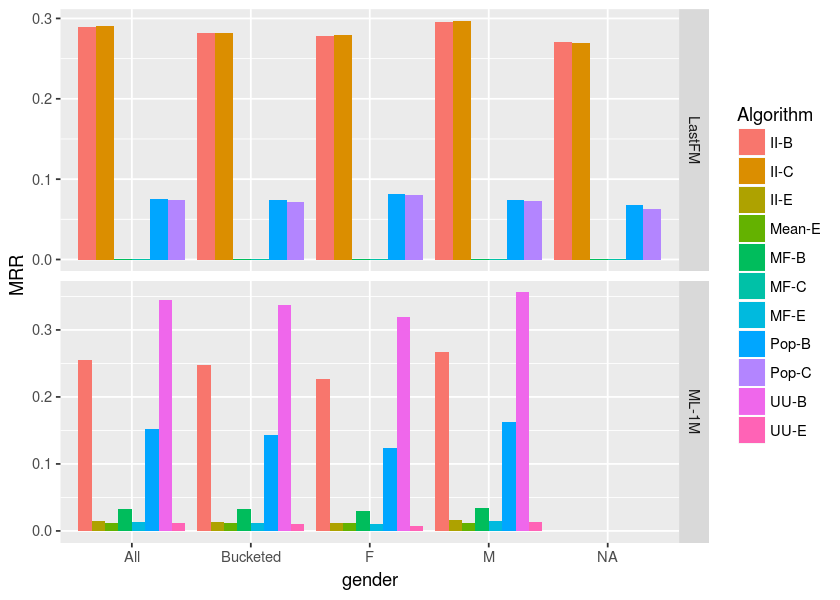

In [64]:
ggplot(combined.results %>% filter(DataSet == "LastFM" | DataSet == "ML-1M")) +
    aes(x=gender, y=MRR, fill=Algorithm) +
    geom_bar(stat="identity", position="dodge") +
    facet_grid(DataSet ~  ., scales="free")

# Analyze by Age

In [65]:
age.results = user.results %>%
    group_by(DataSet, Algorithm, age) %>%
   summarize( MRR=mean(RecipRank, na.rm=TRUE)) %>%
    mutate(age=as.character(age))

In [66]:
bucketed.age.results = user.results %>%
    group_by(DataSet, Algorithm, age) %>%
    summarize( MRR=mean(RecipRank, na.rm=TRUE)) %>%
    group_by(DataSet, Algorithm) %>%
    summarize(MRR = mean(MRR)) %>%
    mutate(age="Bucketed")

In [67]:
overall.age.results = user.results %>%
    group_by(DataSet, Algorithm) %>%
    summarize( MRR=mean(RecipRank, na.rm=TRUE)) %>%
    mutate(age="All")
combined.age.results = rbind(age.results, overall.age.results, bucketed.age.results) %>%
    mutate(age = ordered(age, levels=sub("^Z", "", sort(sub("^([^A-Y])", "Z\\1", 
                                                            unique(age))))))

In [68]:
combined.age.results

DataSet,Algorithm,age,MRR
LastFM,II-B,[1-17],0.3233742
LastFM,II-B,[18-24],0.2995692
LastFM,II-B,[25-34],0.2770049
LastFM,II-B,[35-44],0.2732179
LastFM,II-B,[45-55],0.2750919
LastFM,II-B,[56+],0.2643806
LastFM,II-B,NA,0.2781977
LastFM,II-C,[1-17],0.3208081
LastFM,II-C,[18-24],0.3023708
LastFM,II-C,[25-34],0.2791255


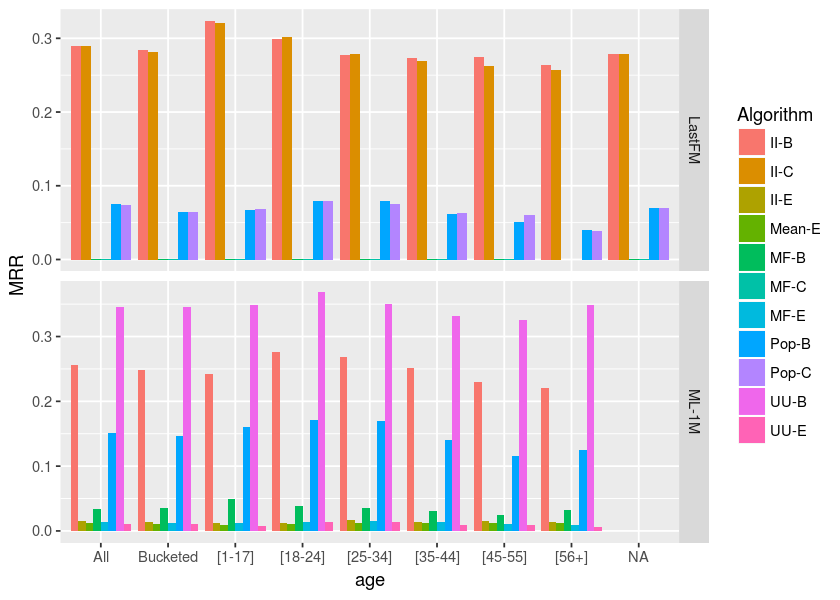

In [70]:
ggplot(combined.age.results %>% filter(DataSet == "LastFM" | DataSet == "ML-1M")) +
    aes(x=age, y=MRR, fill=Algorithm) +
    geom_bar(stat="identity", position="dodge") +
    facet_grid(DataSet ~ ., scales="free")

In [71]:
everything =
    rbind(combined.results %>% rename(DemoValue=gender) %>% mutate(DemoChar="Gender"),
          combined.age.results %>% rename(DemoValue=age) %>% mutate(DemoChar="Age")) %>%
    mutate(DemoValue = ordered(DemoValue, 
                               levels=sub("^Z", "",
                                          sort(sub("^([^A-Y])", "Z\\1", 
                                                   unique(DemoValue))))))

Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”

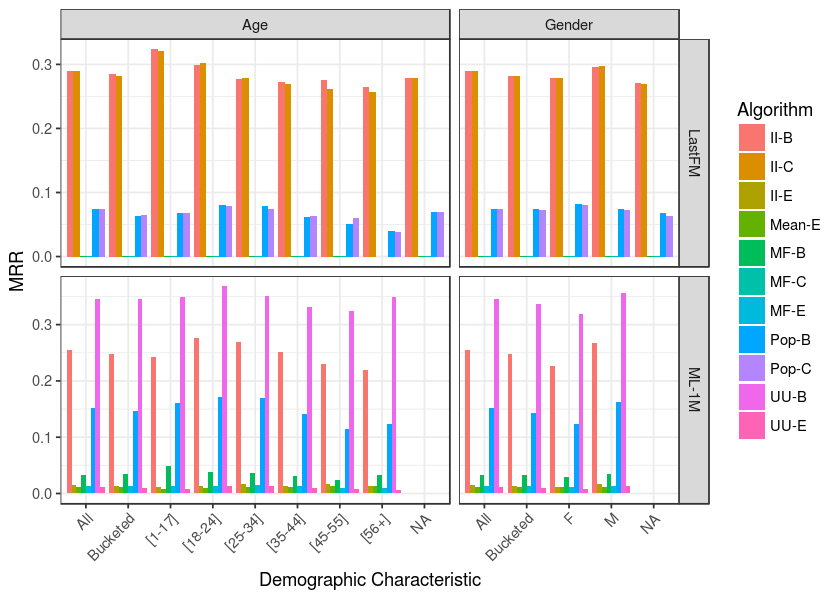

In [75]:
drawplot(file="everything-normal", width=8, height=4, {
    ggplot(everything %>% filter(DataSet == "LastFM" | DataSet == "ML-1M")) +
        aes(x=DemoValue, y=MRR, fill=Algorithm) +
        geom_bar(stat="identity", position="dodge") +
        facet_grid(DataSet ~ DemoChar, scales="free", space="free_x") +
        xlab("Demographic Characteristic") +
        theme_bw() +
        theme(axis.text.x = element_text(angle=45, vjust=1, hjust=1))
})

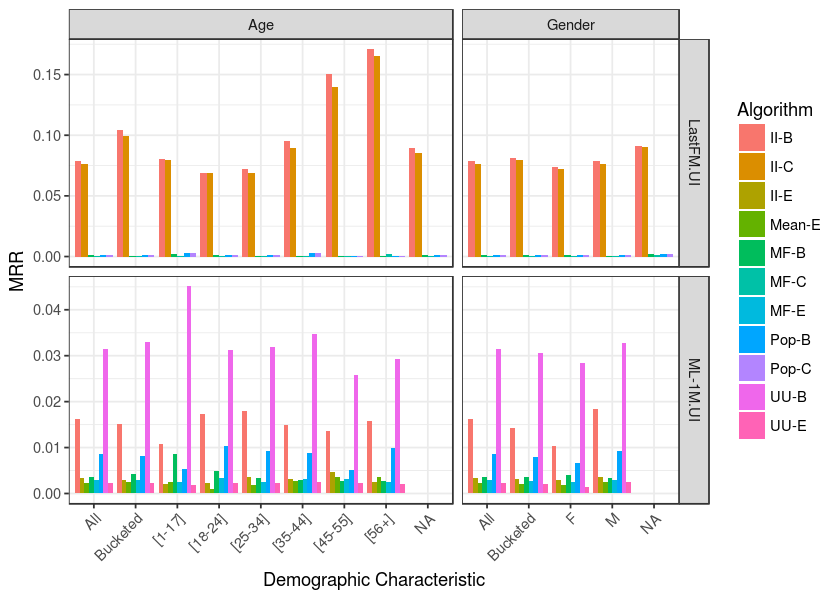

In [76]:
drawplot(file="everything-ui", width=8, height=4, {
    ggplot(everything %>% filter(DataSet == "LastFM.UI" | DataSet == "ML-1M.UI")) +
        aes(x=DemoValue, y=MRR, fill=Algorithm) +
        geom_bar(stat="identity", position="dodge") +
        facet_grid(DataSet ~ DemoChar, scales="free", space="free_x") +
        xlab("Demographic Characteristic") +
        theme_bw() +
        theme(axis.text.x = element_text(angle=45, vjust=1, hjust=1))
})